# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [3]:
# 1) import the pandas library as pd

import pandas as pd

In [5]:
# 2) import the csv file into a variable called df

df = pd.read_csv("Bertrand-physiodata.csv")

In [18]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [19]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [20]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [41]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?

ACC_x and ACC_y and ACC_z have half the frequency   32 Hz
EDA and TEMP have 1/8 of the previous  so  4 Hz
HR has one-fourth of that so 1 Hz

# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [1]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

import matplotlib.pyplot as plt
%matplotlib inline  

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

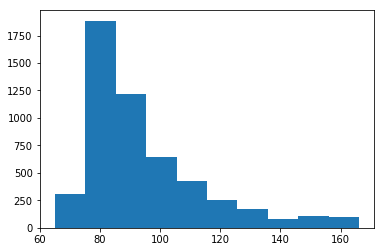

In [9]:
# 9) produce a histogram of the heart rate data; what can you say from it?

plt.hist(df['HR'])
plt.show()

TypeError: nan is not a string

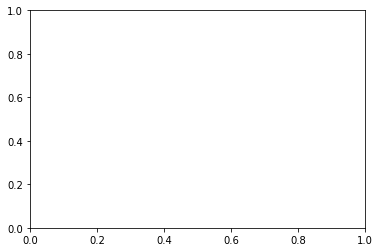

In [6]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv("Bertrand-physiodata.csv")
plt.plot(df['real time'], df['HR'])
plt.show()

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: Number of items in each column didn't match up (because of difference in sampling frequency
- reason 2: The real time is not in a unit that translates to the grap


After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

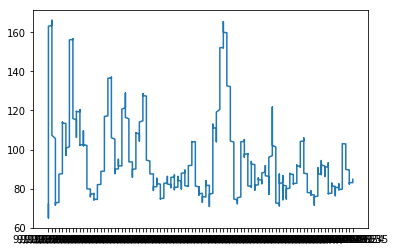

In [40]:
# 12) Fix your dataframe using the link above: 
df1 = df.dropna()
plt.plot(df1['real time'], df1['HR'])
plt.show()

### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

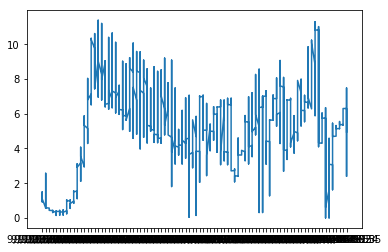

In [43]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data

plt.plot(df1['real time'], df1['EDA'])
plt.show()

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [7]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3

import pandas as pd
df = pd.read_csv("Bertrand-physiodata.csv")
df1 = df.dropna()
df1['real time'].to_datetime

AttributeError: 'Series' object has no attribute 'to_datetime'

In [10]:
# 15) print the mean and median values of the EDA data; explain how they are different
import statistics
print(statistics.mean(df1['EDA']))
print(statistics.median(df1['EDA']))
Mean is a statistical average, median represents the 'middle' term when sequentially listing objects, lowest to highest.

5.18773484390619
5.329635


C:\Users\Jazib Zahir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jazib Zahir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


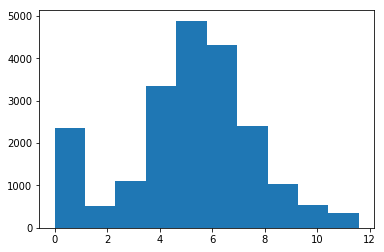

In [11]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?

plt.hist(df['EDA'])
plt.show()



### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [13]:
# 17) filter both the EDA and HR values to keep the non-null rows:

df_EDA = df['EDA'].dropna()
df_HR = df['HR'].dropna()


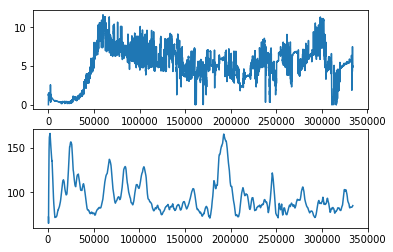

In [21]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

plt.subplot(2,1,1)
plt.plot(df_EDA)
 
plt.subplot(2,1,2)
plt.plot(df_HR)
 
plt.show()

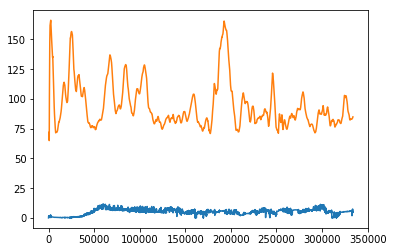

In [22]:
# 19) plot EDA and HR on the same graph; what went wrong?
plt.plot(df_EDA)
plt.plot(df_HR)
plt.show()

HR values are much smaller so we cannot see their fluctuation against EDA

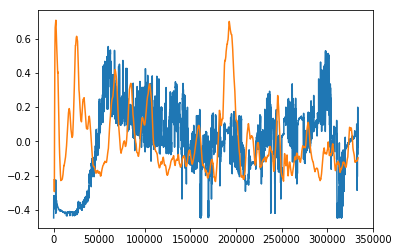

In [23]:
# 21) plot EDA and HR on the same graph; does the result look better?

df_EDA_norm = (df_EDA - df_EDA.mean()) / (df_EDA.max() - df_EDA.min())
df_HR_norm = (df_HR - df_HR.mean()) / (df_HR.max() - df_HR.min())

plt.plot(df_EDA_norm)
plt.plot(df_HR_norm)
plt.show()



In [19]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?
They spike in a comparable manner but from visuals alone we cannot define a clear relationship

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [53]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

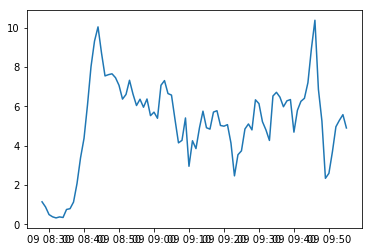

In [27]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7

df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')



df_ED = filtered_df['EDA'].resample('60s').mean()
plt.plot(df_ED)
plt.show()

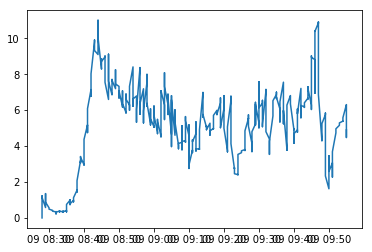

In [34]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window


df_ED = filtered_df['EDA'].rolling('60s').mean()
plt.plot(df_ED)
plt.show()

In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?
Rolling captures more of the original fluctuation while resampling smoothens it out further

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

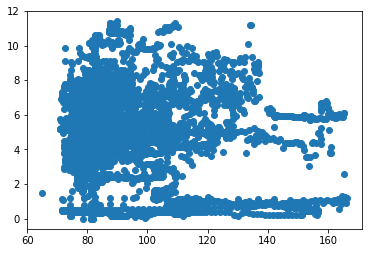

In [36]:
# 26) create a scatter plot between HR and EDA:
plt.scatter(filtered_df['HR'],filtered_df['EDA'])
plt.show()

In [48]:
# 27) compute pearson's correlation between the HR and EDA data

import scipy
from scipy.stats import pearsonr

print(pearsonr(filtered_df['HR'],filtered_df['EDA']))



(nan, 1.0)


In [24]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?

The p of 1 means that there is no statistical significance so there is no linear relationship between the two